In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import tushare as ts
pro = ts.pro_api('3339f390298f8503dc5cbcca9fce9898f10bd3a5cb8ce9315803e5cd')

In [15]:
df = pro.index_basic(**{
    "ts_code": "",
    "market": "",
    "publisher": "",
    "category": "",
    "name": "",
    "limit": "",
    "offset": ""
}, fields=[
    "ts_code",
    "name",
    "market",
    "publisher",
    "category",
    "base_date",
    "base_point",
    "list_date",
    "fullname",
    "index_type"
])

In [16]:
df[df['fullname']=='沪深300指数']

,ts_code,name,market,publisher,category,base_date,base_point,list_date,fullname,index_type
149,000300.SH,沪深300,SSE,中证指数有限公司,规模指数,20041231,1000.0,20050408,沪深300指数,中证规模指数
2864,399300.SZ,沪深300,SZSE,中证指数有限公司,规模指数,20041231,1000.0,20050408,沪深300指数,中证规模指数


In [17]:

# 拉取数据
df_csi300 = pro.index_daily(**{
    "ts_code": "000300.SH",
    "trade_date": "",
    "start_date": 20200101,
    "end_date": 20251001,
    "limit": "",
    "offset": ""
}, fields=[
    "ts_code",
    "trade_date",
    "close",
    "open",
    "high",
    "low",
    "pre_close",
    "change",
    "pct_chg",
    "vol",
    "amount"
])

        

In [18]:
df_csi300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000300.SH,20250930,4640.6935,4629.8987,4647.5031,4616.2243,4620.0528,20.6407,0.4468,247980359.0,6.646241e+08
1,000300.SH,20250929,4620.0528,4555.0342,4647.5691,4541.4252,4550.0487,70.0041,1.5385,274358877.0,6.933952e+08
2,000300.SH,20250926,4550.0487,4576.9142,4597.8472,4550.0487,4593.4875,-43.4388,-0.9457,208482114.0,5.987239e+08
3,000300.SH,20250925,4593.4875,4563.9827,4613.9486,4558.8424,4566.0708,27.4167,0.6004,229823333.0,6.698670e+08
4,000300.SH,20250924,4566.0708,4495.2659,4567.4948,4494.1133,4519.7781,46.2927,1.0242,220482608.0,6.291615e+08
...,...,...,...,...,...,...,...,...,...,...,...
1390,000300.SH,20200108,4112.3172,4139.6315,4149.8130,4101.9801,4160.2274,-47.9102,-1.1516,167585850.0,2.124063e+08
1391,000300.SH,20200107,4160.2274,4137.4019,4161.2504,4135.0972,4129.2954,30.9320,0.7491,139489031.0,1.963891e+08
1392,000300.SH,20200106,4129.2954,4120.5211,4170.6384,4102.3796,4144.9649,-15.6695,-0.3780,175309953.0,2.501821e+08
1393,000300.SH,20200103,4144.9649,4161.2185,4164.2989,4131.8640,4152.2408,-7.2759,-0.1752,142826244.0,2.152163e+08


In [144]:
df_csi300.to_csv('csi_300_index_20200101_20250930.csv', index=False)

In [19]:
try:
    df_csi= pro.index_weight(index_code='000300.SH',trade_date='20250930')
    
    # 3. 从返回的DataFrame中提取股票代码列表
    # 成分股代码在 'con_code' 这一列
    csi300_stock_list = df_csi['con_code'].tolist()
    
    print(f"成功获取到 {len(csi300_stock_list)} 只沪深300成分股。")
    print("部分成分股代码示例:")
    print(csi300_stock_list[:10])

except Exception as e:
    print(f"获取数据失败: {e}")

成功获取到 300 只沪深300成分股。
部分成分股代码示例:
['300750.SZ', '600519.SH', '601318.SH', '600036.SH', '601899.SH', '300502.SZ', '300308.SZ', '000333.SZ', '300059.SZ', '600900.SH']


In [20]:
all_stock_data = pd.read_csv('data/csi300_stk_data_financial_index_balance_cashflow.csv')

In [23]:
# 从中筛选出沪深300成分股的数据
csi300_data = all_stock_data[all_stock_data['ts_code'].isin(csi300_stock_list)]
csi300_data.to_csv('csi300_data_20200101_20250922.csv', index=False)

In [24]:
csi300_data = csi300_data.sort_values(by=['ts_code', 'trade_date'], ascending=True)
csi300_data['ret'] = csi300_data.groupby('ts_code')['close'].pct_change()

In [25]:
csi300_data[csi300_data['ts_code']=='300408.SZ']

,ts_code,trade_date,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,...,credit_impa_loss,use_right_asset_dep,oth_loss_asset,end_bal_cash,beg_bal_cash,end_bal_cash_equ,beg_bal_cash_equ,update_flag,n_cashflow_act_ttm,ret
182,300408.SZ,2020-01-02,23.20,0.7457,1.2407,1.00,30.6669,38.3609,5.5389,10.7842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
385,300408.SZ,2020-01-03,23.77,1.5594,2.5945,2.44,31.4204,39.3033,5.6750,11.0491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.024569
611,300408.SZ,2020-01-06,23.45,0.9370,1.5560,1.16,30.9974,38.7742,5.5986,10.9004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-0.013462
808,300408.SZ,2020-01-07,23.44,0.8615,1.4307,0.99,30.9842,38.7577,5.5962,10.8957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.003941e+09,-0.000426
1296,300408.SZ,2020-01-08,22.80,0.8507,1.4126,0.96,30.1382,37.6995,5.4434,10.5982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.003941e+09,-0.027304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399451,300408.SZ,2025-09-16,42.15,1.0074,1.5554,0.56,36.8784,33.6299,3.9829,10.9533,...,NaN,2348830.6,NaN,2.781062e+09,1.140258e+09,NaN,NaN,1.0,4.510838e+09,0.018116
399581,300408.SZ,2025-09-17,45.49,2.8653,4.4239,1.56,39.8007,36.2947,4.2985,11.8212,...,NaN,2348830.6,NaN,2.781062e+09,1.140258e+09,NaN,NaN,1.0,4.510838e+09,0.079241
399813,300408.SZ,2025-09-18,45.30,2.2431,3.4633,1.15,39.6345,36.1432,4.2805,11.7719,...,NaN,2348830.6,NaN,2.781062e+09,1.140258e+09,NaN,NaN,1.0,4.510838e+09,-0.004177
400360,300408.SZ,2025-09-19,48.33,3.2889,5.0779,1.80,42.2855,38.5607,4.5669,12.5592,...,NaN,2348830.6,NaN,2.781062e+09,1.140258e+09,NaN,NaN,1.0,4.510838e+09,0.066887


In [26]:
# 计算沪深300股指的收益率
df_csi300 = df_csi300.sort_values(by=['ts_code', 'trade_date'], ascending=True)
df_csi300['ret'] = df_csi300['close'].pct_change()

In [27]:
df_csi300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,ret
1394,000300.SH,20200102,4152.2408,4121.3487,4172.6555,4121.3487,4096.5821,55.6587,1.3587,182116772.0,2.701055e+08,NaN
1393,000300.SH,20200103,4144.9649,4161.2185,4164.2989,4131.8640,4152.2408,-7.2759,-0.1752,142826244.0,2.152163e+08,-0.001752
1392,000300.SH,20200106,4129.2954,4120.5211,4170.6384,4102.3796,4144.9649,-15.6695,-0.3780,175309953.0,2.501821e+08,-0.003780
1391,000300.SH,20200107,4160.2274,4137.4019,4161.2504,4135.0972,4129.2954,30.9320,0.7491,139489031.0,1.963891e+08,0.007491
1390,000300.SH,20200108,4112.3172,4139.6315,4149.8130,4101.9801,4160.2274,-47.9102,-1.1516,167585850.0,2.124063e+08,-0.011516
...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20250924,4566.0708,4495.2659,4567.4948,4494.1133,4519.7781,46.2927,1.0242,220482608.0,6.291615e+08,0.010242
3,000300.SH,20250925,4593.4875,4563.9827,4613.9486,4558.8424,4566.0708,27.4167,0.6004,229823333.0,6.698670e+08,0.006004
2,000300.SH,20250926,4550.0487,4576.9142,4597.8472,4550.0487,4593.4875,-43.4388,-0.9457,208482114.0,5.987239e+08,-0.009457
1,000300.SH,20250929,4620.0528,4555.0342,4647.5691,4541.4252,4550.0487,70.0041,1.5385,274358877.0,6.933952e+08,0.015385


In [28]:
# --- 全局参数设定 ---
WINDOW = 252       # 回归窗口期为252天
HALF_LIFE = 63     # 半衰期为63天
MIN_PERIODS = 42   # 最少有效样本数为42天

# 这个函数现在只接收一个 window, 不再需要 min_periods 检查，因为我们在外部处理
def calculate_beta_for_window(window_df, weights_arr):
    """对一个数据窗口DataFrame进行WLS回归。"""
    
    df = window_df.dropna()
    
    # 因为min_periods在rolling()中定义，能进入这里的窗口都已满足条件
    # 但为保险起见，可以保留检查
    if df.shape[0] < MIN_PERIODS:
        return np.nan

    y = df['stock_ret']
    X = sm.add_constant(df['market_ret'])
    
    current_weights = weights_arr[-df.shape[0]:]

    model = sm.WLS(y, X, weights=current_weights)
    results = model.fit()

    return results.params['market_ret']

def get_rolling_beta_for_one_stock(stock_df, window_size, min_p, weights):
    """
    为单只股票的DataFrame计算所有日期的滚动Beta。
    这个函数将被 groupby().apply() 调用。
    """
    # 选取需要进行滚动计算的列
    returns = stock_df[['stock_ret', 'market_ret']]
    
    # 创建一个滚动对象
    rolling_windows = returns.rolling(window=window_size, min_periods=min_p)
    
    # 迭代每一个滚动窗口 (每个窗口都是一个小的DataFrame)
    # 并对每个窗口调用我们的核心计算函数
    beta_values = [
        calculate_beta_for_window(window, weights) for window in rolling_windows
    ]
    
    # 将计算出的beta值列表转换成一个Series，并保持索引不变
    return pd.Series(beta_values, index=stock_df.index)

In [29]:
all_returns_df = csi300_data[['trade_date', 'ts_code', 'ret']].rename(columns={'ret': 'stock_ret'})
csi_returns_df = df_csi300[['trade_date', 'ret']].rename(columns={'ret': 'market_ret'})
all_returns_df['trade_date'] = pd.to_datetime(all_returns_df['trade_date'])
csi_returns_df['trade_date'] = pd.to_datetime(csi_returns_df['trade_date'])

# --- 主流程开始 ---

# 1. 数据对齐：将市场收益率合并到股票收益率DataFrame中
# 这是至关重要的一步，可以避免很多数据不对齐的问题
master_df = pd.merge(all_returns_df, csi_returns_df, on='trade_date')
master_df = master_df.sort_values(by=['ts_code', 'trade_date']).reset_index(drop=True)


# 2. 预先计算最大窗口长度的权重数组 (只计算一次)
decay_factor = 0.5**(1 / HALF_LIFE)
# 注意：arange的顺序是从窗口长度-1到0，这样最近的日期(在窗口末尾)对应指数0，权重最大
weights = decay_factor**np.arange(WINDOW - 1, -1, -1)
# 无需归一化，WLS内部会处理

print("开始为所有股票计算滚动Beta...")

# 使用 groupby().apply() 调用我们的新函数
# Pandas 会将每个 ts_code 对应的子DataFrame传入 get_rolling_beta_for_one_stock 函数
beta_results = master_df.groupby('ts_code').apply(
    get_rolling_beta_for_one_stock,
    window_size=WINDOW,
    min_p=MIN_PERIODS,
    weights=weights
)

# 结果的索引可能是层级的，需要整理
beta_df = beta_results.reset_index()
beta_df.rename(columns={0: 'beta', 'level_1': 'original_index'}, inplace=True)
# 你可能需要根据原始的master_df索引来合并日期等信息
beta_df['trade_date'] = master_df['trade_date']

print("计算完成！")
print(beta_df.dropna().tail())

开始为所有股票计算滚动Beta...
计算完成！
          ts_code  original_index      beta trade_date
400656  688981.SH          400656  1.786026 2025-09-16
400657  688981.SH          400657  1.814614 2025-09-17
400658  688981.SH          400658  1.725423 2025-09-18
400659  688981.SH          400659  1.727354 2025-09-19
400660  688981.SH          400660  1.745199 2025-09-22


/var/folders/46/3tft1dn53072_r6tdkcfpxsc0000gn/T/ipykernel_17282/3939659556.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  beta_results = master_df.groupby('ts_code').apply(


In [33]:
beta_df.to_csv('result/csi300_beta_20200101_20250922.csv', index=False)

In [30]:
beta1 = beta_df[beta_df['ts_code']=='300408.SZ']

<Axes: title={'center': 'Beta of 300408.SZ over time'}, xlabel='trade_date'>

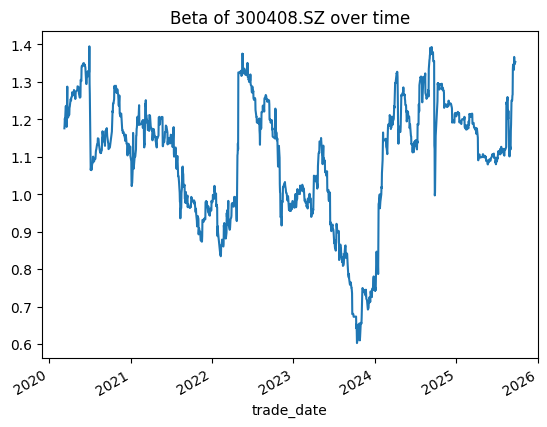

In [31]:
beta1.set_index('trade_date', inplace=True)
beta1.index = pd.to_datetime(beta1.index)
beta1['beta'].plot(title='Beta of 300408.SZ over time')

In [147]:
beta_df

,ts_code,original_index,beta,trade_date
0,000001.SZ,0,NaN,2020-01-02
1,000001.SZ,1,NaN,2020-01-03
2,000001.SZ,2,NaN,2020-01-06
3,000001.SZ,3,NaN,2020-01-07
4,000001.SZ,4,NaN,2020-01-08
...,...,...,...,...
400656,688981.SH,400656,1.786026,2025-09-16
400657,688981.SH,400657,1.814614,2025-09-17
400658,688981.SH,400658,1.725423,2025-09-18
400659,688981.SH,400659,1.727354,2025-09-19


In [87]:
len(beta_df)

400661

In [92]:
csi300_data['size'] = np.log(csi300_data['total_mv'])

In [102]:
size_df = csi300_data[['trade_date', 'ts_code', 'size']]

In [105]:
size_df.reset_index(drop=True, inplace=True)

In [107]:
size_df.to_csv('csi300_size_20200101_20250922.csv', index=False)

In [129]:
# 动量：
# --- 全局参数设定 ---
T = 504           #  lookback period end
L = 21            # lookback period start (skip period)
WINDOW = T - L    # 实际计算窗口大小: 483
SKIP = L          # 需要跳过的近期天数: 21
HALF_LIFE = 126   # 半衰期
MIN_PERIODS = 42  # 最小有效样本数

def calculate_rstr_for_window(window_series, weights_arr):
    """
    对一个数据窗口Series（对数收益率）计算RSTR (修正版)。
    利用索引对齐来确保权重和收益率的精确匹配。
    """
    # 1. 创建一个与传入窗口具有相同索引的权重Series
    # weights_arr的顺序是[w_最近, w_次近, ...], window_series的顺序也是[最近, 次近, ...]
    # 所以可以直接创建Series
    weights_series = pd.Series(weights_arr[:len(window_series)], index=window_series.index)

    # 2. 现在，基于window_series中的NaN来同时过滤收益率和权重
    valid_log_ret = window_series.dropna()
    
    # 如果过滤后样本不足，返回NaN
    if len(valid_log_ret) < MIN_PERIODS:
        return np.nan
        
    # 利用valid_log_ret的索引，从weights_series中选取对应的权重
    valid_weights = weights_series.loc[valid_log_ret.index]
    
    # 3. 归一化有效权重
    normalized_weights = valid_weights / np.sum(valid_weights)

    # 4. 计算加权和，因为索引已对齐，可确保计算准确无误
    rstr = np.sum(valid_log_ret * normalized_weights)
    
    return rstr


# --- 主流程开始 ---

# 1. 预处理：计算对数收益率
# log(1+r) = log(P_t / P_{t-1}) = log(P_t) - log(P_{t-1})
csi300_data['log_ret'] = csi300_data.groupby('ts_code')['close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

# 2. 预先计算最大窗口长度的权重数组 (只计算一次)
decay_factor = 0.5**(1 / HALF_LIFE)
# 权重时间倒序，最近的日期权重最高 (指数为0)
weights = decay_factor**np.arange(0, WINDOW)

# 3. 使用 rolling().apply() 高效计算
#【关键步骤】: 使用 shift(SKIP) 来实现“跳过最近L天”
# shift(21) 会将数据向未来推21天。
# 所以在计算当天的rolling window时，看到的是21天前的数据，完美符合定义。
csi300_data = csi300_data.set_index("trade_date")
rstr_series = csi300_data.groupby('ts_code')['log_ret'] \
                           .apply(lambda x: x.shift(SKIP)
                                             .rolling(window=WINDOW, min_periods=MIN_PERIODS)
                                             .apply(calculate_rstr_for_window, args=(weights,), raw=False))

# 4. 整理结果
rstr_df = rstr_series.reset_index()
rstr_df.rename(columns={'log_ret': 'RSTR'}, inplace=True)
# 由于shift，最开始的一部分会是NaN，同时不满足min_periods的也会是NaN
rstr_df = rstr_df.dropna() 

print("RSTR动量因子计算结果:")
print(rstr_df.tail(10)) 

RSTR动量因子计算结果:
          ts_code  trade_date      RSTR
400651  688981.SH    20250909  0.000556
400652  688981.SH    20250910  0.000546
400653  688981.SH    20250911  0.000766
400654  688981.SH    20250912  0.000749
400655  688981.SH    20250915  0.000852
400656  688981.SH    20250916  0.000859
400657  688981.SH    20250917  0.001058
400658  688981.SH    20250918  0.001019
400659  688981.SH    20250919  0.001002
400660  688981.SH    20250922  0.001008


In [131]:
rstr_df.to_csv('csi300_rstr_20200101_20250922.csv', index=False)

In [135]:
csi300_data[csi300_data['ts_code']=='600000.SH']['close']

trade_date
20200102    12.47
20200103    12.60
20200106    12.46
20200107    12.50
20200108    12.32
            ...  
20250916    13.16
20250917    12.96
20250918    12.75
20250919    12.81
20250922    12.54
Name: close, Length: 1389, dtype: float64

In [3]:
balance_df = pd.read_csv('data/all_balancesheet_data_2020_2025.csv')

In [4]:
balance_df

,ts_code,ann_date,f_ann_date,end_date,report_type,comp_type,end_type,total_share,cap_rese,undistr_porfit,...,accounts_receiv_bill,accounts_pay,oth_rcv_total,fix_assets_total,cip_total,oth_pay_total,long_pay_total,debt_invest,oth_debt_invest,update_flag
0,000001.SZ,20250823,20250823,20250630,1,2,NaN,1.940600e+10,8.070200e+10,2.592070e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,000001.SZ,20250823,20250823,20250630,1,2,2.0,1.940592e+10,8.070200e+10,2.592070e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.513720e+11,1.806120e+11,1
2,000001.SZ,20250419,20250419,20250331,1,2,1.0,1.940592e+10,8.070900e+10,2.556210e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.776340e+11,1.734530e+11,1
3,000001.SZ,20250315,20250315,20241231,1,2,4.0,1.940592e+10,8.071300e+10,2.436050e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.850750e+11,1.766550e+11,1
4,000001.SZ,20241019,20241019,20240930,1,2,3.0,1.940592e+10,8.071500e+10,2.398990e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.774030e+11,1.797940e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157292,002886.SZ,20200818,20200818,20200630,1,1,2.0,1.188372e+08,2.925806e+08,2.955343e+08,...,2.486664e+08,9.972664e+07,2061372.27,2.157106e+08,50247147.10,18357441.76,NaN,NaN,NaN,1
157293,002886.SZ,20200818,20200818,20200630,1,1,2.0,1.188372e+08,2.925806e+08,2.955343e+08,...,2.486664e+08,9.972664e+07,2061372.27,2.157106e+08,50247147.10,18357441.76,NaN,NaN,NaN,0
157294,002886.SZ,20200430,20200430,20200331,1,1,1.0,1.188372e+08,2.912018e+08,2.715949e+08,...,2.783749e+08,1.147534e+08,2369435.52,2.170717e+08,26486237.41,19650992.40,957891.24,NaN,NaN,1
157295,002886.SZ,20200417,20200417,20191231,1,1,4.0,1.188372e+08,2.891037e+08,2.679023e+08,...,3.297504e+08,1.175488e+08,2045664.16,2.216537e+08,20392215.59,43284057.85,2173916.41,NaN,NaN,1


In [5]:
from jqdatasdk import *

auth('18830181826','Gao18830181826')

auth success 


In [10]:
factor_data = get_factor_values(securities=['000001.XSHE'], factors=['size','beta','momentum'], 
                                start_date='2024-06-28', end_date='2025-07-05')
# 查看因子值
factor_data

{'size':             000001.XSHE
 2024-06-28     0.901631
 2024-07-01     0.902081
 2024-07-02     0.903028
 2024-07-03     0.901582
 2024-07-04     0.888186
 ...                 ...
 2025-06-30     1.035424
 2025-07-01     1.036411
 2025-07-02     1.034256
 2025-07-03     1.033474
 2025-07-04     1.025104
 
 [247 rows x 1 columns],
 'beta':             000001.XSHE
 2024-06-28    -0.751280
 2024-07-01    -0.740792
 2024-07-02    -0.740467
 2024-07-03    -0.732222
 2024-07-04    -0.727389
 ...                 ...
 2025-06-30    -0.915517
 2025-07-01    -0.907550
 2025-07-02    -0.897118
 2025-07-03    -0.904189
 2025-07-04    -0.902517
 
 [247 rows x 1 columns],
 'momentum':             000001.XSHE
 2024-06-28    -0.118498
 2024-07-01    -0.141343
 2024-07-02    -0.142734
 2024-07-03    -0.172114
 2024-07-04    -0.168395
 ...                 ...
 2025-06-30    -0.141992
 2025-07-01    -0.063739
 2025-07-02     0.021279
 2025-07-03     0.001468
 2025-07-04    -0.102509
 
 [247 rows x 1 c